# Lab3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

dataset=pd.read_csv('tvmarketing.csv')

In [3]:
#1. Import dataset and display first 5 rows
print(dataset.head())

      TV  Sales
0  230.1   22.1
1   44.5   10.4
2   17.2    9.3
3  151.5   18.5
4  180.8   12.9


In [28]:
#2. Check column data types
print(dataset.dtypes)

TV       float64
Sales    float64
dtype: object


In [29]:
#3. Check the shape of the Data Frame (rows, columns)
print("Shape of dataset:", dataset.shape)

Shape of dataset: (200, 2)


In [4]:
#4. Look at summary statistics
print(dataset.describe)

<bound method NDFrame.describe of         TV  Sales
0    230.1   22.1
1     44.5   10.4
2     17.2    9.3
3    151.5   18.5
4    180.8   12.9
..     ...    ...
195   38.2    7.6
196   94.2    9.7
197  177.0   12.8
198  283.6   25.5
199  232.1   13.4

[200 rows x 2 columns]>


In [5]:
dataset

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


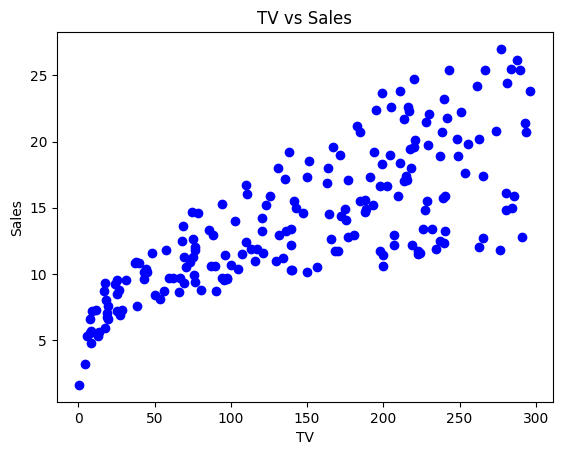

In [47]:
#5. Visualize the relationship between the features and the dependent variable using scatterplots

plt.scatter(dataset['TV'], dataset['Sales'], color='blue')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('TV vs Sales')
plt.show()




In [8]:
#6. Prepare X (feature variables) and y (response variable)

x=dataset[['TV']]
y=dataset[['Sales']]


In [9]:
#7. Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, y_train, X_test, y_test

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
print(x_train)

        TV
54   262.7
123  123.1
45   175.1
38    43.1
113  209.6
..     ...
4    180.8
77   120.5
115   75.1
179  165.6
188  286.0

[140 rows x 1 columns]


In [10]:
#8. Print the shape of train data and test data

print("Train data shape:", x_train.shape, y_train.shape)
print("Test data shape:", x_test.shape, y_test.shape)

Train data shape: (140, 1) (140, 1)
Test data shape: (60, 1) (60, 1)


In [11]:
# 9. Perform Linear Regression (on train data) without using any library and print the coefficients values

x_train_np = np.c_[np.ones(x_train.shape[0]), x_train]
beta = np.linalg.inv(x_train_np.T.dot(x_train_np)).dot(x_train_np.T).dot(y_train)
intercept_manual, coef_manual = beta[0], beta[1]
print("Manual Coefficients:", coef_manual)
print("Manual Intercept:", intercept_manual)

Manual Coefficients: [0.04818328]
Manual Intercept: [6.97229441]


In [12]:
# 10.Create the model using the calculated coefficients and make predictions on the testing set

x_test_np = np.c_[np.ones(x_test.shape[0]), x_test]
y_pred_manual = x_test_np.dot(beta)


In [14]:
# 11.Perform Linear Regression using library(sklearn)

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [38]:
# 12.Print the intercept and coefficients
print("Sklearn Coefficients:", model.coef_[0])
print("Sklearn Intercept:", model.intercept_)

Sklearn Coefficients: [0.04860552]
Sklearn Intercept: [6.95749093]


In [39]:
# 13.Make predictions on the testing set - y_pred

y_pred = model.predict(x_test)

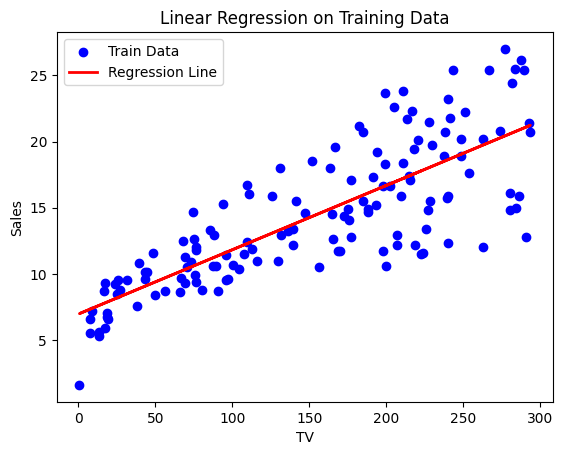

In [40]:
# 14.Plot train data and the model

plt.scatter(x_train, y_train, color='blue', label='Train Data')
plt.plot(x_train, model.predict(x_train), color='red', linewidth=2, label='Regression Line')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Linear Regression on Training Data')
plt.legend()
plt.show()

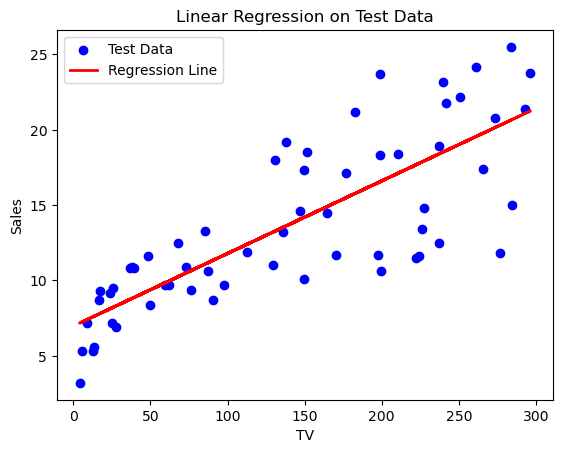

In [20]:
# 15.Plot test data and the model

plt.scatter(x_test,y_test,color='blue',label='Test Data')
plt.plot(x_test,model.predict(x_test),color='red',linewidth=2, label='Regression Line')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Linear Regression on Test Data')
plt.legend()
plt.show()

In [42]:
# 16.Print Mean Squared Error and R Squared Value
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R Squared Value:", r2)


Mean Squared Error: 11.871731652224694
R Squared Value: 0.5435441136490873


In [43]:
# 17.Calculate and print R Squared and Adjusted R Squared values without any library


n = x_test.shape[0]
k = x_test.shape[1]
y_test_np = y_test.values.flatten()  # Convert y_test to numpy array
r2_manual = 1 - (sum((y_test_np - y_pred_manual.flatten()) ** 2) / sum((y_test_np - np.mean(y_test_np)) ** 2))
adj_r2_manual = 1 - ((1 - r2_manual) * (n - 1) / (n - k - 1))
print("Manual R Squared:", r2_manual)
print("Manual Adjusted R Squared:", adj_r2_manual)

Manual R Squared: 0.5435441136490873
Manual Adjusted R Squared: 0.5356741845740716
